# Training History Summary

This notebook loads training logs saved during model training and plots learning curves
(e.g., Dice coefficient and loss) for optic **cup** and **disc** U-Net models.

It expects training histories saved under:
`runs/<run_name>/training_history.csv`.


In [8]:
#imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# config
cup_run  = "cup_256_unet"
disc_run = "disc_256_unet"
FONT_SIZE = 14
AXES_TITLE_FONT_SIZE = 12
AXES_NUM_FONT_SIZE = 10
LEGEND_FONT_SIZE = 10
DOUBLE_HORIZONTAL_FIG = (12, 5) 


#directories

PROJECT_ROOT = Path.cwd().resolve().parents[0]
RUNS_DIR = PROJECT_ROOT / "runs"
cup_csv_path  = RUNS_DIR / cup_run / "training_history.csv"
disc_csv_path = RUNS_DIR / disc_run / "training_history.csv"

# Load CSV data
cup_df  = pd.read_csv(cup_csv_path)
disc_df = pd.read_csv(disc_csv_path)

def get_best_epoch(df, metric="val_dice_coef"):
    return int(df.loc[df[metric].idxmax(), "epoch"])
    
CUP_EPOCH  = get_best_epoch(cup_df,  "val_dice_coef")
DISC_EPOCH = get_best_epoch(disc_df, "val_dice_coef")

print("Best cup epoch:", CUP_EPOCH)
print("Best disc epoch:", DISC_EPOCH)

Best cup epoch: 43
Best disc epoch: 54


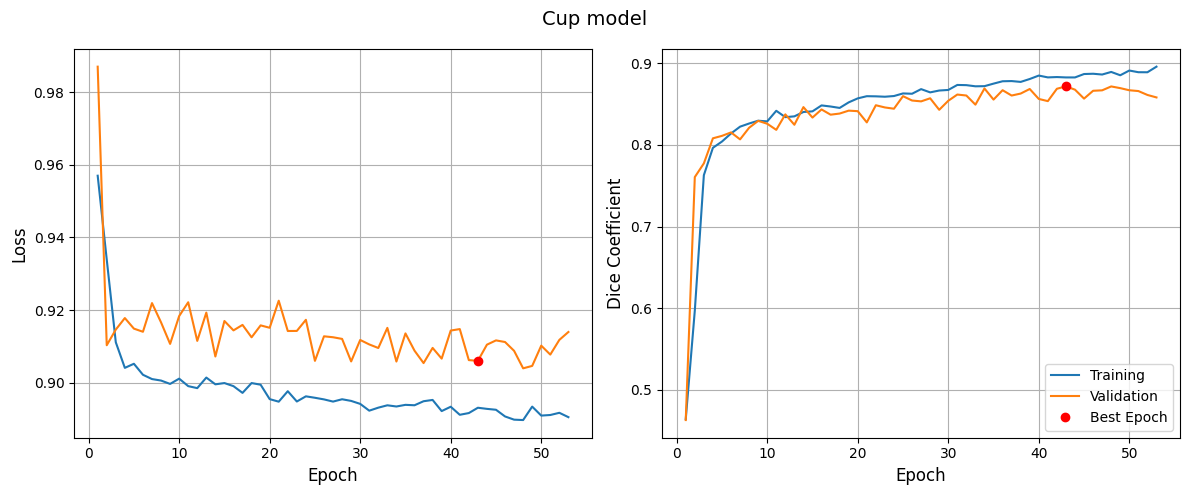

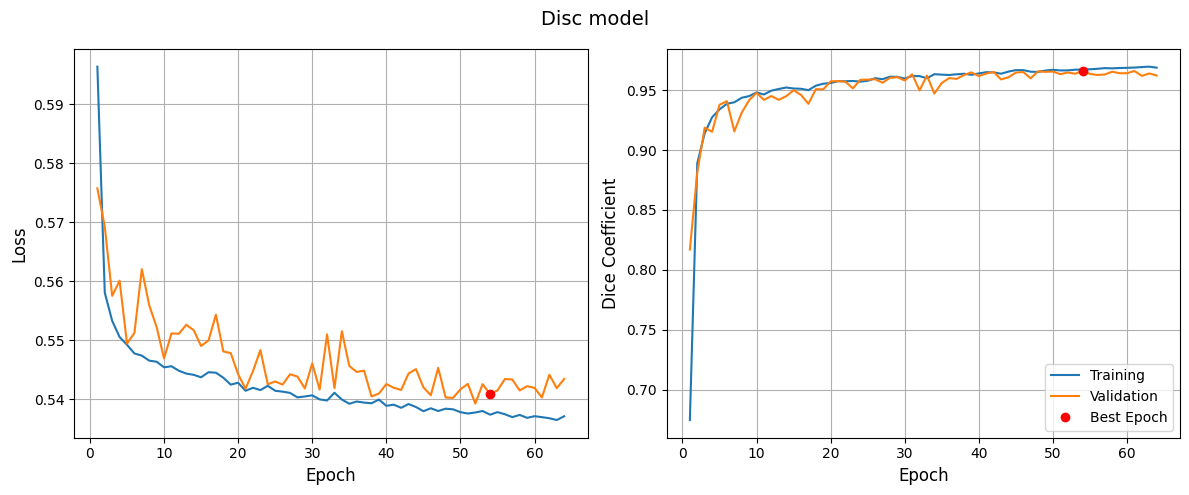

In [9]:
def plot_loss_and_dice_two_panel(df, best_epoch, title_prefix=None):
    fig, axs = plt.subplots(1, 2, figsize=DOUBLE_HORIZONTAL_FIG)

    # Loss subplot (left)
    axs[0].plot(df["epoch"], df["loss"], label="Training")
    if "val_loss" in df.columns:
        axs[0].plot(df["epoch"], df["val_loss"], label="Validation")
        best_loss = df.loc[df["epoch"] == best_epoch, "val_loss"].values[0]
    else:
        best_loss = df.loc[df["epoch"] == best_epoch, "loss"].values[0]

    axs[0].plot(best_epoch, best_loss, "ro", label="Best Epoch")
    axs[0].set_xlabel("Epoch", fontsize=AXES_TITLE_FONT_SIZE)
    axs[0].set_ylabel("Loss", fontsize=AXES_TITLE_FONT_SIZE)
    axs[0].tick_params(axis="both", labelsize=AXES_NUM_FONT_SIZE)
    axs[0].grid(True)

    # Dice subplot (right)
    axs[1].plot(df["epoch"], df["dice_coef"], label="Training")
    if "val_dice_coef" in df.columns:
        axs[1].plot(df["epoch"], df["val_dice_coef"], label="Validation")
        best_dice = df.loc[df["epoch"] == best_epoch, "val_dice_coef"].values[0]
    else:
        best_dice = df.loc[df["epoch"] == best_epoch, "dice_coef"].values[0]

    axs[1].plot(best_epoch, best_dice, "ro", label="Best Epoch")
    axs[1].set_xlabel("Epoch", fontsize=AXES_TITLE_FONT_SIZE)
    axs[1].set_ylabel("Dice Coefficient", fontsize=AXES_TITLE_FONT_SIZE)
    axs[1].tick_params(axis="both", labelsize=AXES_NUM_FONT_SIZE)
    axs[1].legend(fontsize=LEGEND_FONT_SIZE)
    axs[1].grid(True)

    if title_prefix:
        fig.suptitle(title_prefix, fontsize=FONT_SIZE)

    plt.tight_layout()
    plt.show()

plot_loss_and_dice_two_panel(cup_df, CUP_EPOCH, title_prefix="Cup model")
plot_loss_and_dice_two_panel(disc_df, DISC_EPOCH, title_prefix="Disc model")